In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('aggregate_covid_country.csv')

In [3]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [7]:
df1=df[['Country','Confirmed','Recovered','Deaths']]

In [8]:
ds_grp=df1.groupby(["Country"], as_index=False).mean()

In [9]:
ds_grp

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,1470.126984,165.436508,37.055556
1,Albania,327.404762,203.873016,12.928571
2,Algeria,1905.317460,851.944444,184.380952
3,Andorra,329.944444,164.690476,17.611111
4,Angola,15.015873,4.015873,1.039683
...,...,...,...,...
183,West Bank and Gaza,158.500000,69.825397,0.896825
184,Western Sahara,2.436508,1.476190,0.007937
185,Yemen,21.396825,0.730159,3.650794
186,Zambia,121.309524,41.912698,1.706349


In [10]:
ds_grp.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.801388,0.926449
Recovered,0.801388,1.000000,0.759967
Deaths,0.926449,0.759967,1.000000


<AxesSubplot:>

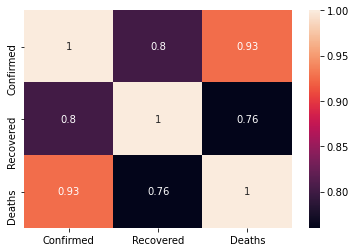

In [48]:
sns.heatmap(ds_grp.corr(),annot=True)

# Top 5 Countries based on Confirmed,Recovered and Deaths

In [42]:
ds_grp1=ds_grp.sort_values('Confirmed',ascending=False,ignore_index=True)
ds_grp1.set_index('Country',inplace=True)
ds_grp1

,Confirmed,Recovered,Deaths
Country,,,
US,453164.817460,66894.269841,25571.182540
Italy,94415.452381,34562.023810,12446.634921
Spain,94370.563492,45795.801587,10333.412698
United Kingdom,72623.309524,347.849206,10547.666667
Germany,71795.690476,48435.698413,2537.031746
...,...,...,...
Bhutan,4.825397,1.658730,0.000000
MS Zaandam,4.063492,0.000000,0.888889
Papua New Guinea,2.849206,1.460317,0.000000


In [43]:
ds_grp2=ds_grp.sort_values('Recovered',ascending=False,ignore_index=True)
ds_grp2.set_index('Country',inplace=True)
ds_grp2

,Confirmed,Recovered,Deaths
Country,,,
US,453164.817460,66894.269841,25571.182540
China,70409.603175,53781.460317,3052.833333
Germany,71795.690476,48435.698413,2537.031746
Spain,94370.563492,45795.801587,10333.412698
Italy,94415.452381,34562.023810,12446.634921
...,...,...,...
Holy See,4.857143,0.777778,0.000000
Yemen,21.396825,0.730159,3.650794
South Sudan,57.706349,0.579365,0.523810


In [44]:
ds_grp3=ds_grp.sort_values('Deaths',ascending=False,ignore_index=True)
ds_grp3.set_index('Country',inplace=True)
ds_grp3

,Confirmed,Recovered,Deaths
Country,,,
US,453164.817460,66894.269841,25571.182540
Italy,94415.452381,34562.023810,12446.634921
United Kingdom,72623.309524,347.849206,10547.666667
Spain,94370.563492,45795.801587,10333.412698
France,69416.968254,19993.571429,9600.269841
...,...,...,...
Saint Vincent and the Grenadines,6.293651,3.007937,0.000000
Fiji,7.769841,3.777778,0.000000
Cambodia,63.682540,46.730159,0.000000


Text(0, 0.5, 'Confirmed')

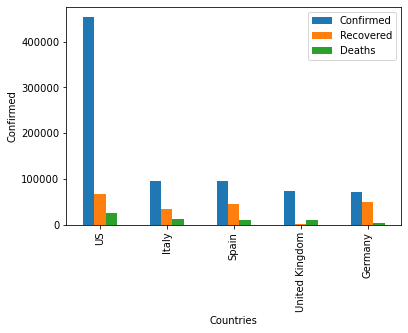

In [45]:
ds_grp1.head(5).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Confirmed')

Text(0, 0.5, 'Recovered')

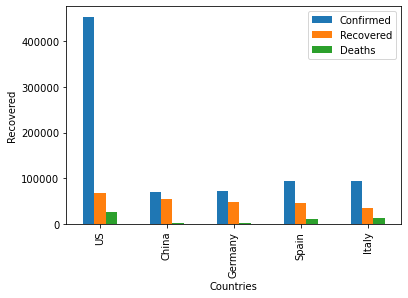

In [46]:
ds_grp2.head(5).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Recovered')

Text(0, 0.5, 'Recovered')

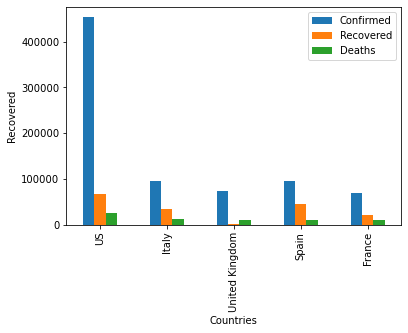

In [40]:
ds_grp3.head(5).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Recovered')

# Active Cases

In [18]:
active=ds_grp['Confirmed']-(ds_grp['Recovered']+ds_grp['Deaths'])

In [19]:
active

0      1267.634921
1       110.603175
2       868.992063
3       147.642857
4         9.960317
          ...     
183      87.777778
184       0.952381
185      17.015873
186      77.690476
187       9.428571
Length: 188, dtype: float64

In [20]:
active.mean()

4860.630783519081

# Best Performing Country

In [21]:
best_recovery_rate=ds_grp['Recovered']/ds_grp['Confirmed']

In [22]:
best_recovery_rate.sort_values(ascending=False)

36     0.763837
30     0.733799
168    0.730402
78     0.724397
143    0.713552
         ...   
157    0.010040
122    0.005634
178    0.004790
104    0.000000
98     0.000000
Length: 188, dtype: float64

In [23]:
ds_grp.loc[36]

Country        China
Confirmed    70409.6
Recovered    53781.5
Deaths       3052.83
Name: 36, dtype: object

China has the best recovery Rate

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
y=df.loc[:, ['Deaths']]
x=df.loc[:, ['Country','Recovered',"Confirmed"]]
x

,Country,Recovered,Confirmed
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,0,0
3,Andorra,0,0
4,Angola,0,0
...,...,...,...
23683,West Bank and Gaza,365,429
23684,Western Sahara,6,9
23685,Yemen,10,249
23686,Zambia,336,920


In [26]:
x['Country']=le.fit_transform(x['Country'])

In [27]:
x['Country']=x['Country'].astype('int64')

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Country    23688 non-null  int64
 1   Recovered  23688 non-null  int64
 2   Confirmed  23688 non-null  int64
dtypes: int64(3)
memory usage: 555.3 KB


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [30]:
max_score=0
lr=LinearRegression()
for i in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2=r2_score(y_test,predlr)
    if r2>max_score:
        max_score=r2
        final=i
print('for', i, 'max r2 score is', max_score)

for 99 max r2 score is 0.9244178095699496


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=99, test_size=0.20)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
r2=r2_score(y_test,predlr)
r2

0.8946162695807709

In [32]:
MSE=mean_squared_error(y_test,predlr)

In [33]:
MSE

2151124.1339572505

In [34]:
MAE=mean_absolute_error(y_test,predlr)

In [35]:
MAE

271.3112843586522

In [36]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr,x,y,cv=5).mean())

0.14450171239471862


In [47]:
import joblib
joblib.dump(predlr,'Covid.pkl')

['Covid.pkl']